✅ Accuracy (Original features): 0.9635
✅ Accuracy (PCA-reduced features): 0.9708

📊 Confusion Matrix (Original):
 [[77  2]
 [ 3 55]]

📊 Confusion Matrix (PCA):
 [[78  1]
 [ 3 55]]

🔢 PCA Components retained: 3


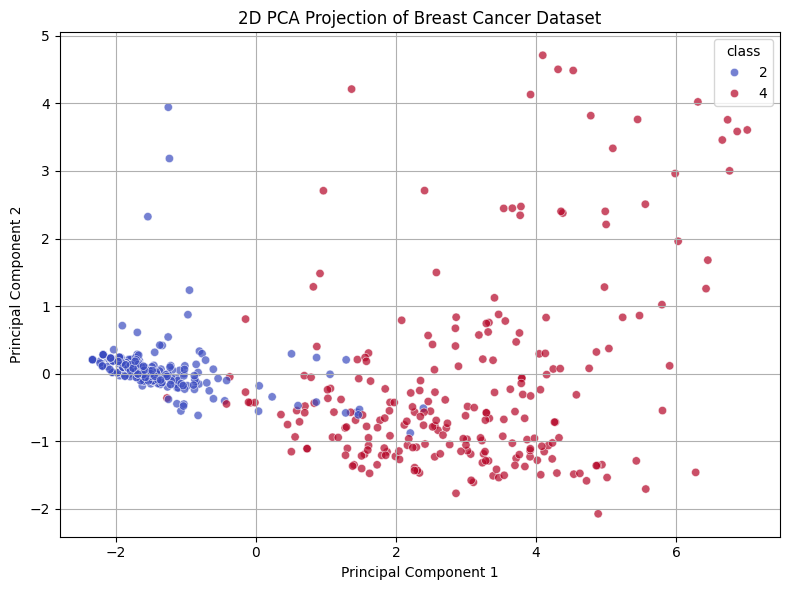

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load dataset
df = pd.read_csv("breastCancer.csv")

# Step 2: Preprocess
df['bare_nucleoli'] = pd.to_numeric(df['bare_nucleoli'], errors='coerce')
df = df.dropna()
df = df.drop(columns=["id"])

X = df.drop("class", axis=1)
y = df["class"]

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)

# Find number of components that explain >80% variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_var >= 0.80) + 1

# Apply PCA with selected components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Split datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Train SVC on original and PCA data
svc_original = SVC()
svc_pca = SVC()

svc_original.fit(X_train, y_train)
svc_pca.fit(X_pca_train, y_train)

# Step 7: Predict and evaluate
y_pred_original = svc_original.predict(X_test)
y_pred_pca = svc_pca.predict(X_pca_test)

acc_original = accuracy_score(y_test, y_pred_original)
acc_pca = accuracy_score(y_test, y_pred_pca)

cm_original = confusion_matrix(y_test, y_pred_original)
cm_pca = confusion_matrix(y_test, y_pred_pca)

print(f"✅ Accuracy (Original features): {acc_original:.4f}")
print(f"✅ Accuracy (PCA-reduced features): {acc_pca:.4f}")
print("\n📊 Confusion Matrix (Original):\n", cm_original)
print("\n📊 Confusion Matrix (PCA):\n", cm_pca)
print(f"\n🔢 PCA Components retained: {n_components}")

# Step 8: Plot 2D PCA Projection
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("2D PCA Projection of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix